In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from string import punctuation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
import joblib
#nltk.download("stopwords")

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

In [2]:
 # сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

 # сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

 # сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
# with open("test.csv" , encoding="utf-8") as f: 
#     data=f.read()

In [4]:
# data[:1000]

In [5]:
# data = data.replace("<review>","")
# data = data.replace("</review>","")
# data = data.split("\n\n")
# data[:2]

In [6]:
# df=pd.DataFrame({"text":data, "label":[0]*len(data)})
# df.text=df.text.apply(lambda x: x.replace('\n',''))
# df.to_excel("data.xlsx",index=False)

In [7]:
df=pd.read_excel('data.xlsx')
print(df.shape)
df.head(2)

(101, 2)


,text,label
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.",0
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.",0


In [8]:
df.isna().sum()

text     1
label    0
dtype: int64

In [9]:
df=df[~df.text.isna()]

In [10]:
df.isna().sum()

text     0
label    0
dtype: int64

# Предобработка

In [11]:
df.text[0]

'Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.'

In [12]:
def preprocess_text(text):
    tokens = mystem.lemmatize(str(text).lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text
    
df['prepare_text']=df.text.apply(preprocess_text)
joblib.dump(df,'df.joblib')
df=joblib.load('df.joblib')

In [13]:
df.head(20)

,text,label,prepare_text
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.",0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.",0,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранят

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['prepare_text'].values)
X.shape

(100, 2424)

In [15]:
X

<100x2424 sparse matrix of type '<class 'numpy.float64'>'
	with 6406 stored elements in Compressed Sparse Row format>

# Dostoevsky + K-means + T-SNE

## D+T

In [16]:
from node2vec import Node2Vec
import networkx as nx
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import pyplot as plt, rc, cm# def convert_graph(edgelist,name):

In [17]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [18]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [19]:
messages = df.prepare_text

results = model.predict(messages, k=5)

In [20]:
# neutral=[]
# positive=[]
# negative=[]
# for message, sentiment in zip(messages, results):
# #     positive=sentiment['positive']
#     print(message, '=>', sentiment)

In [21]:
# frame=pd.DataFrame(message, sentiment)
frame_m=[]
frame_r=[]
neutral=[]
positive=[]
negative=[]
for message, sentiment in zip(messages, results):
    frame_m.append(message)
    frame_r.append(sentiment)
    positive.append(sentiment['positive'])
    negative.append(sentiment['negative'])
    neutral.append(sentiment['neutral'])

In [22]:
frame=pd.DataFrame({"text":frame_m})
frame["sentiment"]=frame_r

In [23]:
frame["positive"]=positive
frame["negative"]=negative
frame["neutral"]=neutral
# frame["neutral"]=neutral

In [24]:
frame

,text,sentiment,positive,negative,neutral
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться,"{'neutral': 0.4843900501728058, 'negative': 0.2689514458179474, 'positive': 0.1778208613395691, 'skip': 0.08036746829748154, 'speech': 0.004080137703567743}",0.177821,0.268951,0.484390
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь,"{'neutral': 0.5544804334640503, 'negative': 0.22271016240119934, 'skip': 0.11597072333097458, 'positive': 0.1067005917429924, 'speech': 0.005230126902461052}",0.106701,0.222710,0.554480
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить,"{'neutral': 0.607673168182373, 'negative': 0.3140605390071869, 'positive': 0.08757384121417999, 'skip': 0.0695517510175705, 'speech': 0.004341503139585257}",0.087574,0.314061,0.607673
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...,"{'neutral': 0.40734341740608215, 'skip': 0.20182321965694427, 'positive': 0.1778208613395691, 'negative': 0.1097157895565033, 'speech': 0.004080137703567743}",0.177821,0.109716,0.407343
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавишдовольный свой телефончик покупка сразу обн

In [25]:
label_dostoevsky=['positive' if positive>negative else 'negative' for positive,negative in zip(frame.positive.values,frame.negative.values)]
# label_dostoevsky

In [26]:
frame["label_pn"]=label_dostoevsky
frame

,text,sentiment,positive,negative,neutral,label_pn
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться,"{'neutral': 0.4843900501728058, 'negative': 0.2689514458179474, 'positive': 0.1778208613395691, 'skip': 0.08036746829748154, 'speech': 0.004080137703567743}",0.177821,0.268951,0.484390,negative
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь,"{'neutral': 0.5544804334640503, 'negative': 0.22271016240119934, 'skip': 0.11597072333097458, 'positive': 0.1067005917429924, 'speech': 0.005230126902461052}",0.106701,0.222710,0.554480,negative
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить,"{'neutral': 0.607673168182373, 'negative': 0.3140605390071869, 'positive': 0.08757384121417999, 'skip': 0.0695517510175705, 'speech': 0.004341503139585257}",0.087574,0.314061,0.607673,negative
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...,"{'neutral': 0.40734341740608215, 'skip': 0.20182321965694427, 'positive': 0.1778208613395691, 'negative': 0.1097157895565033, 'speech': 0.004080137703567743}",0.177821,0.109716,0.407343,positive
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клав

In [27]:
frame.label_pn.value_counts()

negative    63
positive    37
Name: label_pn, dtype: int64

In [28]:
X_dostoevsky=TSNE(n_components=2, learning_rate=100,
                   init='random', perplexity=80, early_exaggeration=50).fit_transform(X)
X_dostoevsky.shape

(100, 2)

In [29]:
joblib.dump(X_dostoevsky,'X_dostoevsky.joblib')
joblib.dump(frame,'frame2.joblib')

['frame2.joblib']

Разбиение на 2 кластера (позитивные и негативные)

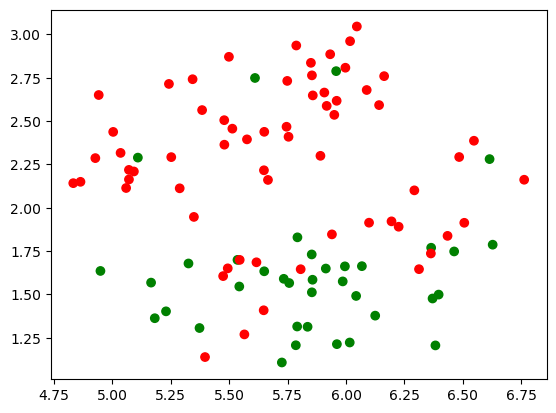

In [30]:
fig = plt.figure()
colors=[ 'g' if positive>negative else 'r' for positive,negative in zip(frame.positive.values,frame.negative.values)]
ax = plt.axes()
ax.scatter(X_dostoevsky[:,0], X_dostoevsky[:,1], c=colors)
plt.draw()
# for angle in range(0, 360):
#    ax.view_init(angle, 30)
#    plt.draw()
#    plt.pause(.001)

plt.show()

Разбиение на 3 кластера (позитивные, негативные и нейтральные)

In [31]:
X_dostoevsky=TSNE(n_components=3, learning_rate=100,
                   init='random', perplexity=90, early_exaggeration=50).fit_transform(X)
X_dostoevsky.shape

(100, 3)

In [32]:
joblib.dump(X_dostoevsky,'X_dostoevsky3.joblib')
joblib.dump(frame,'frame3.joblib')

['frame3.joblib']

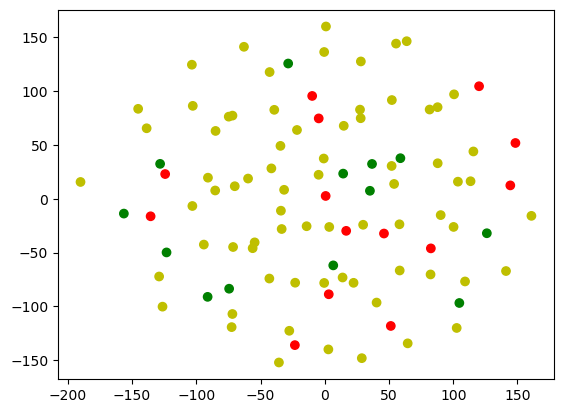

In [33]:
fig = plt.figure()
# colors=[ 'g' if (positive>negative)&(positive>neutral)
#                 else 'r' if (positive<negative)&(neutral<negative) else 'y' for positive,negative,neutral in zip(frame.positive.values,frame.neutral.values,frame.negative.values)]
colors=[]
for positive,negative,neutral in zip(frame.positive.values,frame.negative.values,frame.neutral.values):
    if (positive>negative)&(positive>=neutral):
        colors.append('g')
    elif (negative>positive)&(negative>neutral):
        colors.append('r')
    elif (neutral>positive)&(neutral>negative):
        colors.append('y')
ax = plt.axes()
ax.scatter(X_dostoevsky[:,0], X_dostoevsky[:,1], c=colors)
plt.draw()
# for angle in range(0, 360):
#    ax.view_init(angle, 30)
#    plt.draw()
#    plt.pause(.001)

plt.show()

In [34]:
label_dost=[]
for positive,negative,neutral in zip(frame.positive.values,frame.negative.values,frame.neutral.values):
    if (positive>negative)&(positive>=neutral):
        label_dost.append("positive")
    elif (negative>positive)&(negative>neutral):
        label_dost.append("negative")
    elif (neutral>positive)&(neutral>negative):
        label_dost.append("neutral")


frame["label_pnn"]=pd.Series(label_dost)
frame

,text,sentiment,positive,negative,neutral,label_pn,label_pnn
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться,"{'neutral': 0.4843900501728058, 'negative': 0.2689514458179474, 'positive': 0.1778208613395691, 'skip': 0.08036746829748154, 'speech': 0.004080137703567743}",0.177821,0.268951,0.484390,negative,neutral
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь,"{'neutral': 0.5544804334640503, 'negative': 0.22271016240119934, 'skip': 0.11597072333097458, 'positive': 0.1067005917429924, 'speech': 0.005230126902461052}",0.106701,0.222710,0.554480,negative,neutral
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить,"{'neutral': 0.607673168182373, 'negative': 0.3140605390071869, 'positive': 0.08757384121417999, 'skip': 0.0695517510175705, 'speech': 0.004341503139585257}",0.087574,0.314061,0.607673,negative,neutral
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...,"{'neutral': 0.40734341740608215, 'skip': 0.20182321965694427, 'positive': 0.1778208613395691, 'negative': 0.1097157895565033, 'speech': 0.004080137703567743}",0.177821,0.109716,0.407343,positive,neutral
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 

In [35]:
frame.label_pnn.value_counts()

neutral     73
negative    14
positive    13
Name: label_pnn, dtype: int64

In [36]:
kd=pd.DataFrame()

In [37]:
kd['positive']=frame.positive
kd['negative']=frame.negative
kd['neutral']=frame.neutral

In [38]:
kd['label_d']=label_dost

In [39]:
kd

,positive,negative,neutral,label_d
0,0.177821,0.268951,0.484390,neutral
1,0.106701,0.222710,0.554480,neutral
2,0.087574,0.314061,0.607673,neutral
3,0.177821,0.109716,0.407343,neutral
4,0.067557,0.103759,0.766304,neutral
5,0.212079,0.136618,0.341593,neutral
6,0.177821,0.217348,0.212079,negative
7,0.082707,0.156115,0.644235,neutral
8,0.067557,0.492198,0.164526,negative
9,0.061886,0.103759,0.699264,neutral


In [40]:
labell=df.prepare_text

In [41]:
kd['text']=labell

In [42]:
kd

,positive,negative,neutral,label_d,text
0,0.177821,0.268951,0.484390,neutral,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться
1,0.106701,0.222710,0.554480,neutral,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь
2,0.087574,0.314061,0.607673,neutral,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить
3,0.177821,0.109716,0.407343,neutral,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...
4,0.067557,0.103759,0.766304,neutral,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавишдовольный свой телефончик покупка сразу обновлять последний версия телефон нужно ничто лишний аппарат стоить свой деньги рекомендовать !!!"
5,0.212079,0.136618,0.341593,neutral,"удобный клавиатура русский раскладка 2 сей карта удобство работа мужской приятный дешевый вид черный цвет экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс )- приятный набор виджет рабочий стол моментальный 

In [43]:
label_k=[text if label_d=='neutral' else 'DELETE' for text,label_d in zip(kd.text, kd.label_d)]


In [44]:
# label_k

In [45]:
helpp=pd.DataFrame()
k=pd.DataFrame()

In [46]:
k['text']=label_k
helpp=k[k['text']!= 'DELETE']
helpp['label_help']=0

C:\Users\User\AppData\Local\Temp\ipykernel_17188\2657888779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpp['label_help']=0


In [47]:
k

,text
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавишдовольный свой телефончик покупка сразу обновлять последний версия телефон нужно ничто лишний аппарат стоить свой деньги рекомендовать !!!"
5,"удобный клавиатура русский раскладка 2 сей карта удобство работа мужской приятный дешевый вид черный цвет экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс )- приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавиштелефон покупаться звонилка дополнение htc hd2 андройд нужный долгожитель приятный дизайн 2 симкарта 3 номер ), хороший качество связь фишка кверть клавиатура ), удобный использование функционал

In [48]:
# helpp

In [49]:
vectorizer = TfidfVectorizer()
X_help = vectorizer.fit_transform(helpp['text'].values)
X_help.shape

(73, 2160)

In [50]:
kmeans = KMeans(n_clusters=2,random_state=0, n_init='auto').fit(X_help)
helpp.label_help=kmeans.labels_

C:\Users\User\AppData\Local\Temp\ipykernel_17188\1532976212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpp.label_help=kmeans.labels_


In [51]:
helpp

,text,label_help
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться,1
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь,1
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить,0
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...,1
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавишдовольный свой телефончик покупка сразу обновлять последний версия телефон нужно ничто лишний аппарат стоить свой деньги рекомендовать !!!",1
5,"удобный клавиатура русский раскладка 2 сей карта удобство работа мужской приятный дешевый вид черный цвет экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс )- приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавиштелефон покупаться звонилка дополнение htc hd2 андройд нужный долгожитель приятный дизайн 2 симкарта 3 номер ), хороший качество связь фишка кверть клавиатура ), удобный исп

In [52]:
helpp.label_help.value_counts()

1    53
0    20
Name: label_help, dtype: int64

In [53]:
dkm=pd.DataFrame({"text":labell, "label":label_dost})

In [54]:
dkm

,text,label
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться,neutral
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь,neutral
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить,neutral
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...,neutral
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавишдовольный свой телефончик покупка сразу обновлять последний версия телефон нужно ничто лишний аппарат стоить свой деньги рекомендовать !!!",neutral
5,"удобный клавиатура русский раскладка 2 сей карта удобство работа мужской приятный дешевый вид черный цвет экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс )- приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавиштелефон покупаться звонилка дополнение htc hd2 андройд нужный долгожитель приятный дизайн 2 симкарта 3 номер ), хороший качество связь фишка кверть 

In [55]:
label_dkm=[]
for label in (dkm['label']):
    if label == 'positive':
        label_dkm.append(1)
    elif label == 'negative':
        label_dkm.append(0)
    elif label == 'neutral':
        label_dkm.append('neutral')      

In [56]:
dkm['lbl']=label_dkm
for ind1 in helpp.index:
    for ind2 in dkm.index:
        if ind1 == ind2:
            dkm.label=helpp.label_help

In [57]:
# for label,lbl in zip(dkm.label,dkm.lbl):
#     if (lbl=='neutral'):
#         dkm['lbl']=dkm['label']

dkm.loc[dkm['lbl']=='neutral','lbl']=dkm['label']


In [58]:
dkm

,text,label,lbl
0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться,1.0,1.0
1,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранять читаемость отличие большинство сенсорник битый пиксел засвет самсунговский кверть менее удобный пользоваться ((( буква б ь просто убивать ((( нокиевский кверть интуитивно понятный дружелюбный пользователь подстройка телефон вынос экран нужный приложение перемена значение кнопка существенно облегчать жизнь,1.0,1.0
2,подробно комментарияхка сожаление факт поломка месяц использование сильно подпортить впечатление телефон попытаться устанавливать языковой обновление итог экран смерть отдавать ремонт сказать полететь материнский плата суть месяц лежать сц печальный опыт htc купить,0.0,0.0
3,любительница громкий музыка тихо телефон !! приложение мало память маленький толком скачать мочь вечно приходиться удалять бывало сенсор заедать особый причина телефон 1 5 месяц телефон намного брать !!! пожалеть ...,1.0,1.0
4,"дата выпуск 2011 г емкость 1430 mah технология экран tft тип экран 262 тыс цветок размер экран 320 x 240 px диагональ экран 2.4 "", fm радио mp3 плеер поддержка карта память e mail клиент html браузер edge gprs bluetooth 2.0 встроенный камера количество пиксел 2 mpx поддержка видеоудобный клавиатура русский раскладка 2 сей карта удобство работа экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс ) - приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавишдовольный свой телефончик покупка сразу обновлять последний версия телефон нужно ничто лишний аппарат стоить свой деньги рекомендовать !!!",1.0,1.0
5,"удобный клавиатура русский раскладка 2 сей карта удобство работа мужской приятный дешевый вид черный цвет экран яркий цвет удобный настройка шрифт батарея 1500 ма ч фантастика 5 сутки предел качество связь эхо максимальный громкость разговор убавлять 2 деление метро слышно эхо наблюдаться качество отделка передний панель цена 2 симкарта известный бренд глюк приятный дизайн интерфейс )- приятный набор виджет рабочий стол моментальный поиск 200м контакт гибкий настройка быстрый клавиштелефон покупаться звонилка дополнение htc hd2 андройд нужный долгожитель приятный дизайн 2 симкарта 3 номер ), хороший качество связь фишка кве

In [59]:
dkm=dkm.drop(columns=['label'])

In [60]:
result_kd=pd.DataFrame()

In [61]:
result_kd['y']=dkm.lbl
result_kd.index.name='Id'

In [62]:
result_kd.y=result_kd.y.astype(int)

In [63]:
result_kd

,y
Id,
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,0


In [64]:
y=['pos' if y==1 else 'neg' for y in result_kd.y.values]

In [65]:
result_kd['y']=y

In [66]:
result_kd

,y
Id,
0,pos
1,pos
2,neg
3,pos
4,pos
5,pos
6,neg
7,pos
8,neg


In [67]:
# result_kd.to_csv("res_new_kd.csv")